In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform
import os
for dirname, _, filenames in os.walk('..\Handwritten-Digit-Recognition-main\DigitRecognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import shutil
import os
logs_path = "./logs"
if os.path.exists(logs_path):
    shutil.rmtree(logs_path)

In [3]:
train = pd.read_csv(r'C:\Users\kingb\OneDrive\Desktop\Handwritten-Digit-Recognition-main\DigitRecognizer\train.csv')
test = pd.read_csv(r'C:\Users\kingb\OneDrive\Desktop\Handwritten-Digit-Recognition-main\DigitRecognizer\test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [6]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [7]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

In [8]:
X_tsn = X/255
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [11]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [12]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [13]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [14]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


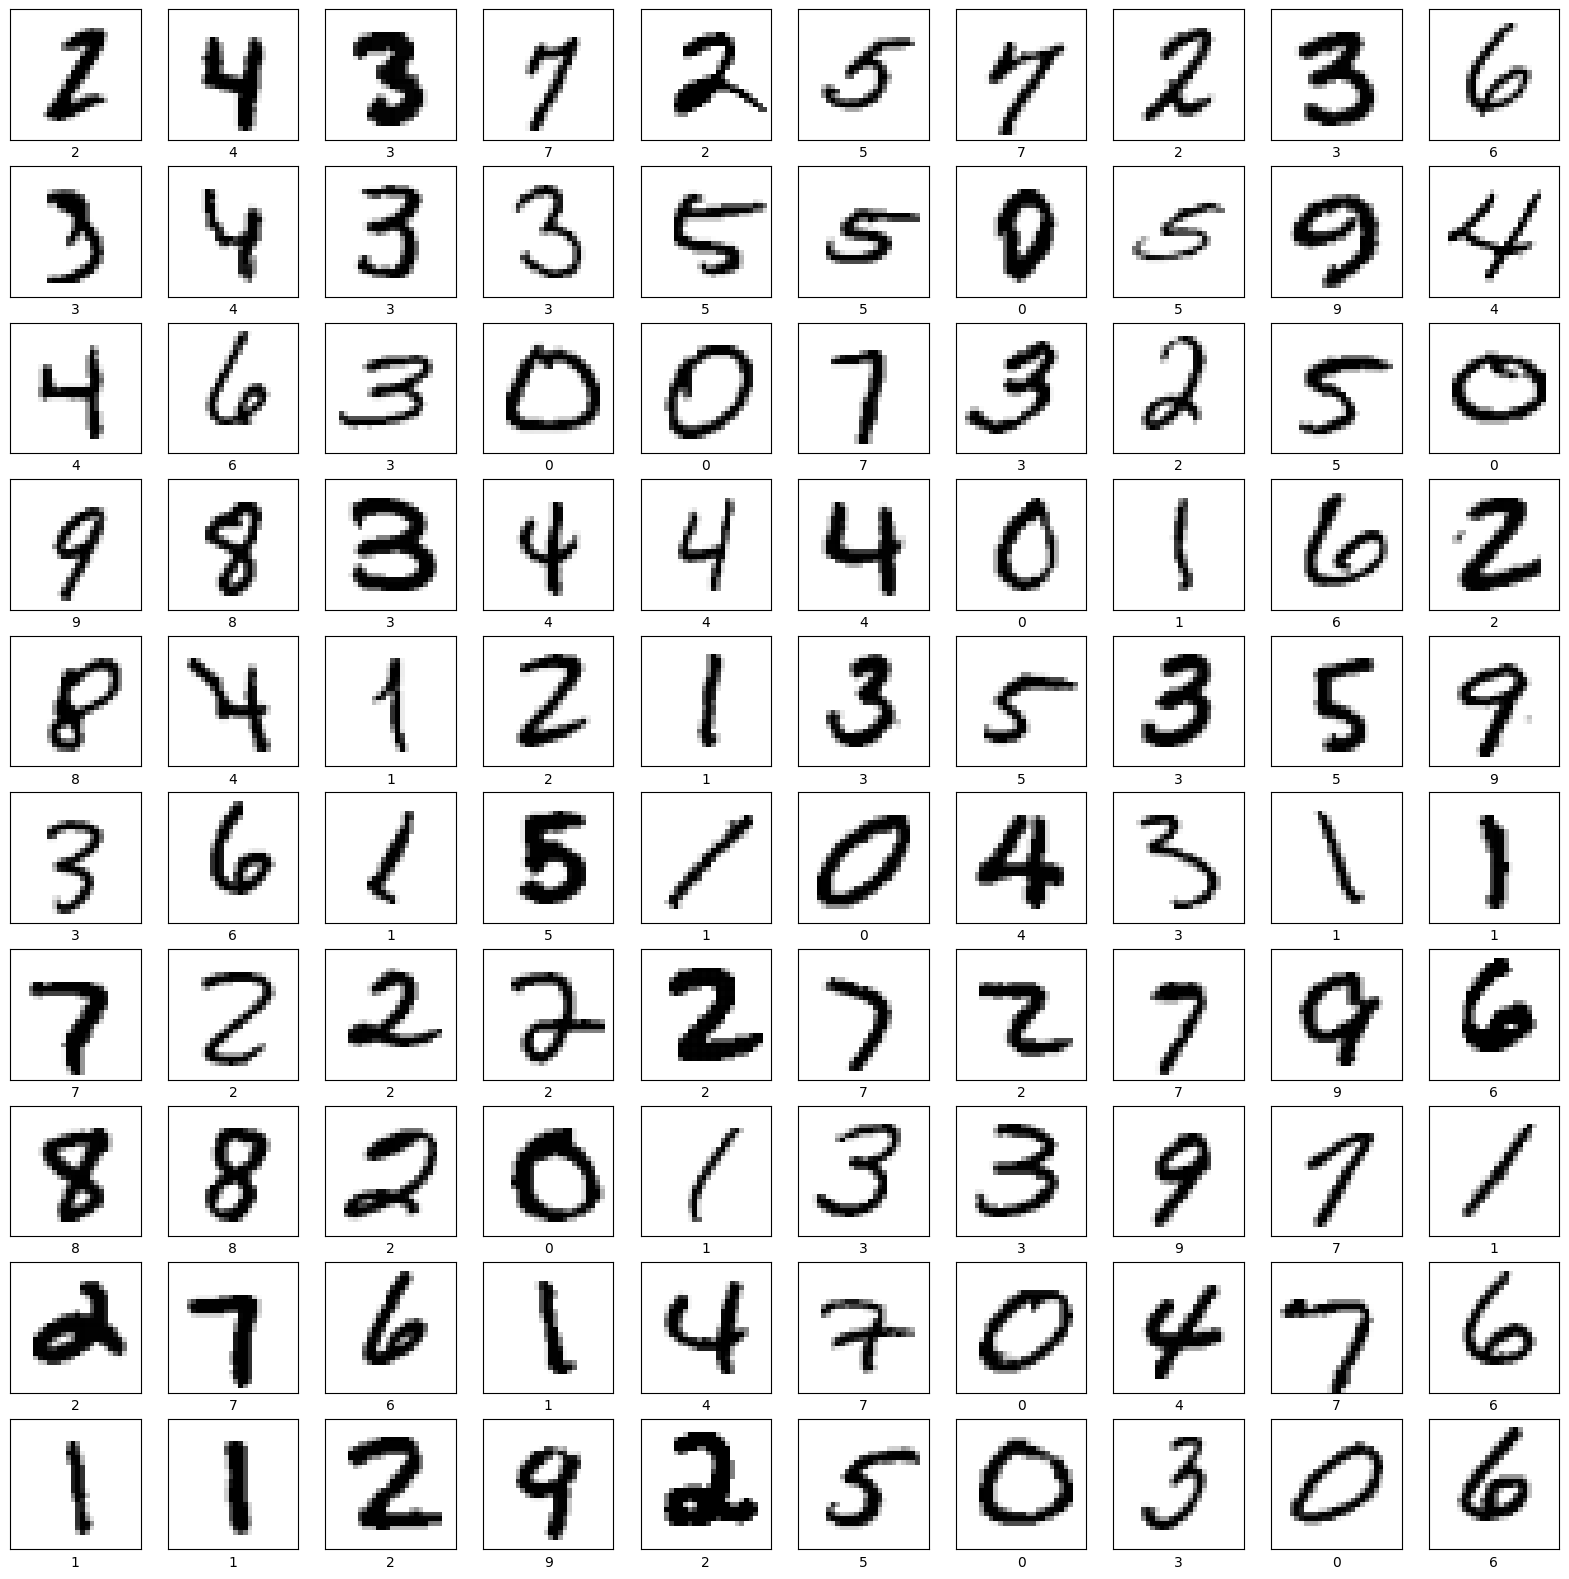

In [16]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [17]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [18]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [19]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [22]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [23]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)
print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 21s 18ms/step - loss: 0.2784 - accuracy: 0.9125 - val_loss: 0.0841 - val_accuracy: 0.9733
Epoch 2/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0884 - accuracy: 0.9715 - val_loss: 0.0634 - val_accuracy: 0.9815
Epoch 3/10
1050/1050 [==============================] - 16s 16ms/step - loss: 0.0637 - accuracy: 0.9804 - val_loss: 0.0543 - val_accuracy: 0.9829
Epoch 4/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.0501 - val_accuracy: 0.9842
Epoch 5/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0438 - val_accuracy: 0.9865
Epoch 6/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0464 - val_accuracy: 0.9874
Epoch 7/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0484 -

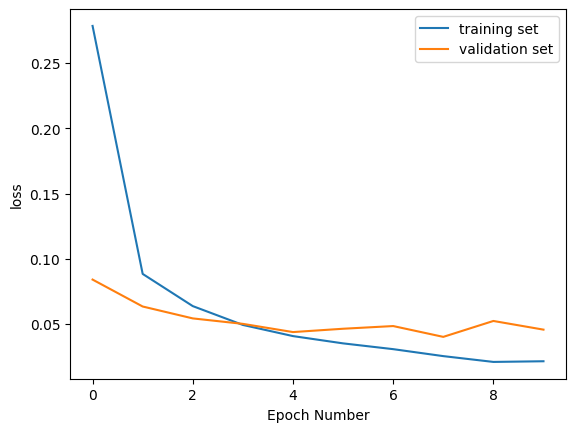

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

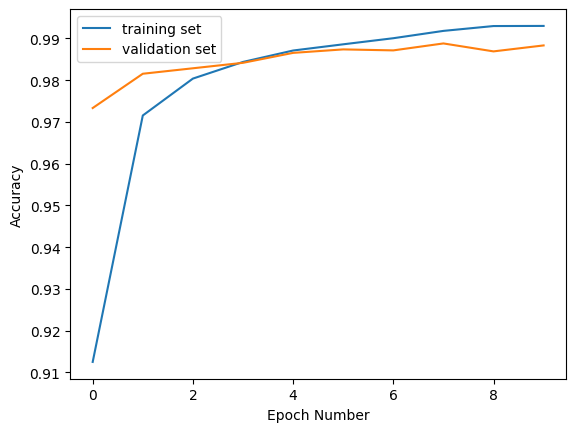

In [25]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [26]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [27]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.008247815072536469
Train accuracy:  0.9976488351821899


In [28]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [29]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04570027440786362
Validation accuracy:  0.9883333444595337


In [30]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

C:\Users\kingb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
loaded_model = tf.keras.models.load_model(model_name)

In [32]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 2s 5ms/step


In [33]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [34]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.267039e-10,1.000000e+00,1.102032e-09,1.272643e-16,7.604227e-10,6.981455e-13,1.939452e-10,1.425192e-12,2.520067e-08,6.353011e-14
1,5.912188e-14,3.206265e-09,9.217582e-12,9.999999e-01,9.451909e-13,1.794311e-08,9.341950e-17,5.271005e-09,7.369102e-10,6.845368e-08
2,4.782546e-11,2.181475e-08,1.826167e-08,8.366663e-06,1.410743e-13,4.808133e-09,1.114898e-09,3.270213e-12,9.999915e-01,3.333018e-10
3,4.162733e-12,1.000000e+00,8.356390e-10,4.317683e-15,4.302178e-08,2.571189e-11,1.156528e-10,2.615591e-09,3.144413e-09,4.105104e-12
4,5.785974e-11,1.012813e-13,9.389582e-13,3.324360e-08,4.048802e-07,1.913086e-09,5.930766e-16,2.631016e-07,5.864258e-07,9.999987e-01
...,...,...,...,...,...,...,...,...,...,...
8395,1.370525e-14,2.401615e-13,6.295092e-17,3.990964e-16,1.000000e+00,1.158704e-09,2.233054e-10,1.380395e-13,6.089237e-14,7.342965e-10
8396,5.939816e-13,1.865988e-15,2.475573e-21,2.789946e-11,5.190005e-18,1.000000e+00,4.653605e-10,4.682824e-19,1.295111e-08,7.687042e-14
8397,2.205637e-09,7.441364e-09,8.622638e-13,3.059686e-12,2.355254e-08,3.054320e-09,1.047250e-13,9.999977e-01,1.120215e-09,2.211150e-06
8398,4.574789e-08,5.635450e-13,5.644277e-11,3.049564e-13,1.035375e-07,2.701378e-07,9.999996e-01,2.332931e-15,1.677797e-09,2.429630e-11


In [35]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


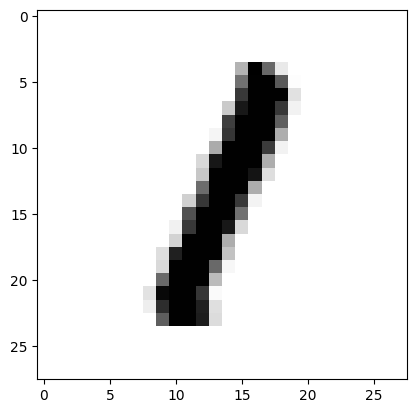

In [36]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

C:\Users\kingb\AppData\Local\Temp\ipykernel_18992\1712679185.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


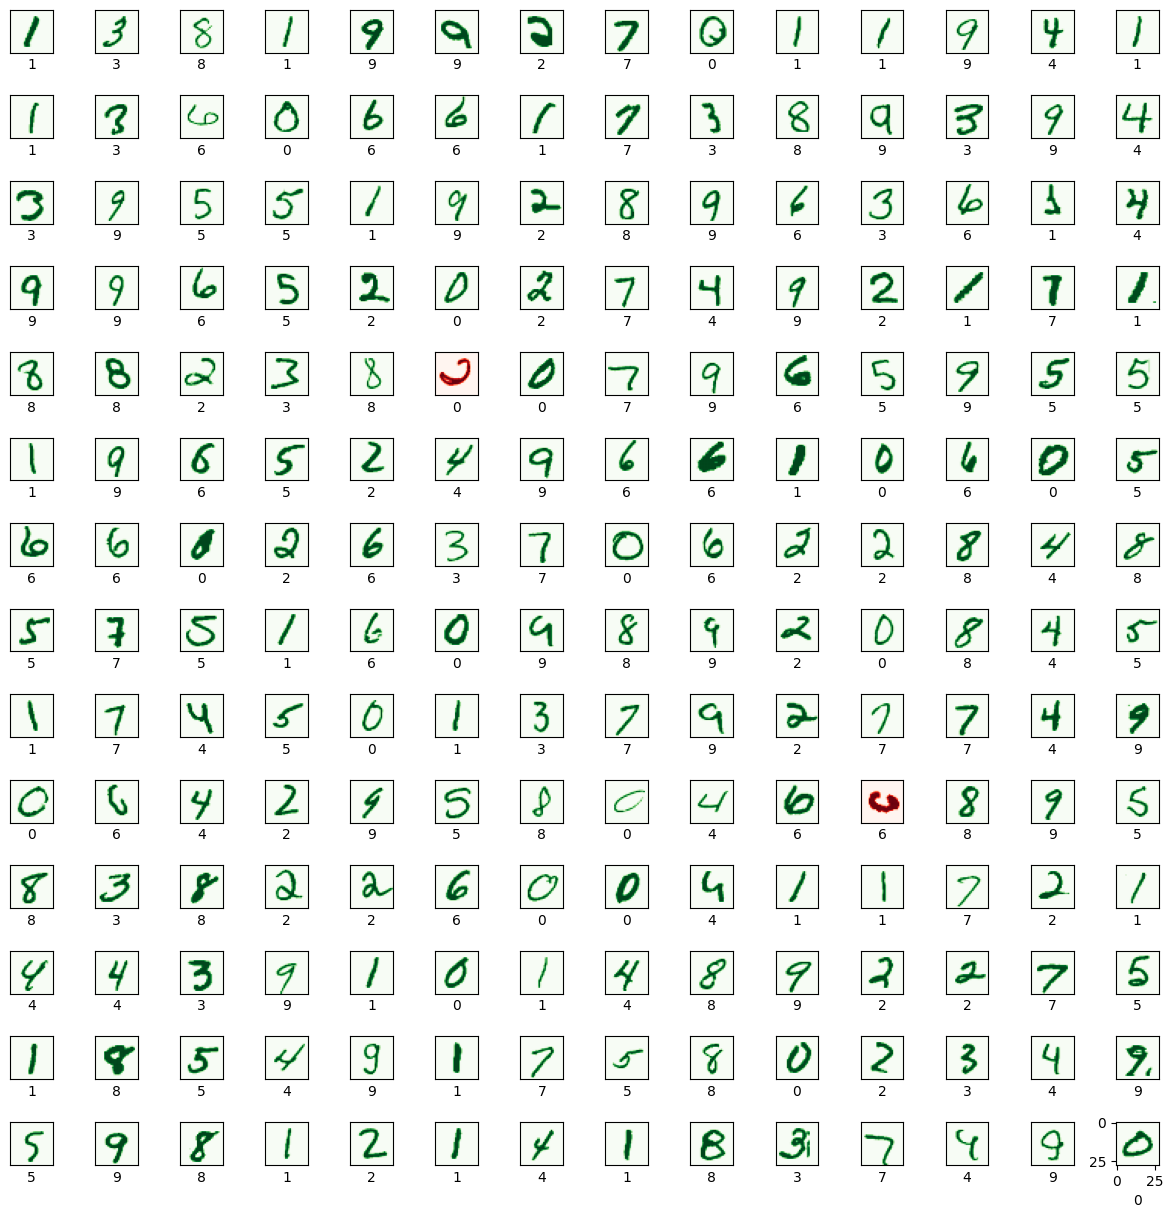

In [37]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))
for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

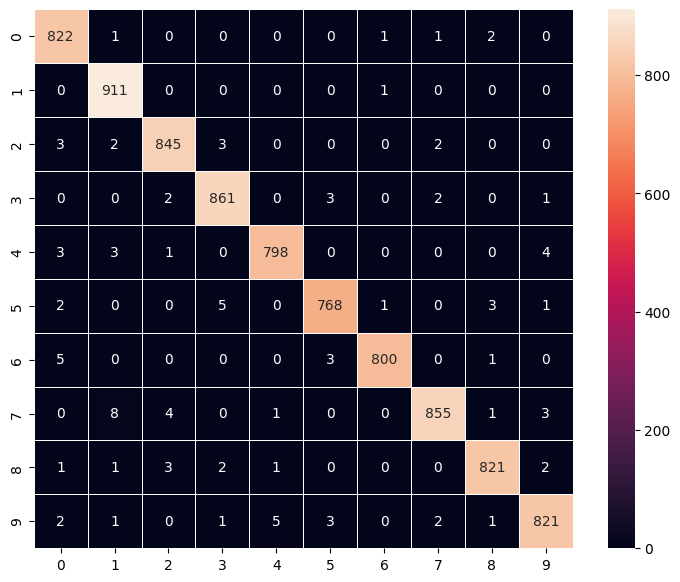

In [38]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [39]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 6s 6ms/step
predictions_one_hot: (28000, 10)


In [40]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,6.958841e-13,2.540691e-11,1.000000e+00,4.653248e-11,6.978161e-11,1.235805e-16,3.103900e-16,2.342346e-10,1.004529e-08,1.070918e-15
1,9.999994e-01,1.602586e-10,2.693070e-08,2.210336e-10,2.725888e-10,3.463357e-08,4.538578e-07,2.396294e-08,7.038360e-08,2.086086e-08
2,5.768162e-10,3.046193e-11,3.583262e-10,1.153810e-06,4.289207e-05,3.981222e-08,1.254846e-13,4.340269e-08,6.352433e-06,9.999496e-01
3,9.859172e-01,8.497470e-08,8.490023e-04,4.089793e-05,4.786131e-06,9.341483e-07,2.813078e-07,2.032370e-06,8.312418e-04,1.235356e-02
4,5.702529e-13,2.551995e-08,8.921143e-08,9.999992e-01,8.320696e-17,1.285255e-10,1.520414e-15,8.830596e-10,7.045292e-07,1.182676e-10
...,...,...,...,...,...,...,...,...,...,...
27995,1.019055e-13,6.003004e-21,1.267289e-17,1.140715e-10,2.741743e-09,7.351519e-12,1.895506e-20,5.548695e-10,4.728888e-11,1.000000e+00
27996,5.352131e-08,2.453038e-10,2.301743e-08,5.799052e-09,4.422192e-09,1.987178e-10,1.916087e-14,9.999781e-01,8.236638e-11,2.183187e-05
27997,2.353349e-21,9.369191e-15,1.160684e-16,1.000000e+00,1.215752e-21,2.358399e-14,8.339699e-26,1.643974e-14,5.076194e-14,2.826506e-12
27998,6.124715e-14,4.050127e-14,2.237217e-15,1.906072e-10,5.068238e-07,3.597030e-12,1.400920e-19,2.568779e-09,3.208596e-12,9.999995e-01


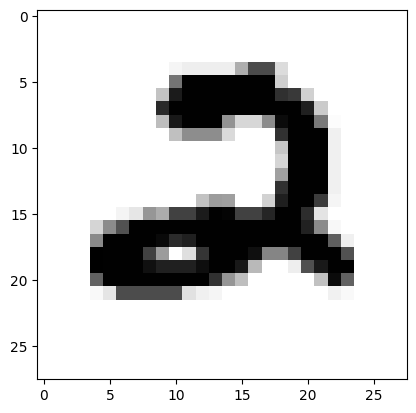

In [41]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [42]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1
test_pred.head()

875/875 [==============================] - 5s 6ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [43]:
test_pred.to_csv('submission.csv', index = False)

In [44]:
import os, pickle

In [45]:
import pickle
with open(r"C:\Users\kingb\OneDrive\Desktop\Handwritten-Digit-Recognition-main\model\dr.pkl", "wb") as file:
    pickle.dump(dr, file)

NameError: name 'dr' is not defined